In [1]:
#biblioteki
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

#import pliku csv
students = pd.read_csv('student-mat.csv', encoding = "ISO-8859-1")
students.head(50)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [2]:
#analiza danych/statystyka
print(students.describe())
print(students.info())
print(students.isnull().values.any())

students

              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.9988

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [3]:
#usuwanie zbędnych danych
students.drop(['school','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','guardian','traveltime','studytime','failures','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic','famrel','freetime','goout','health','absences','G1','G2'], axis=1, inplace = True)
students

,sex,age,Dalc,Walc,G3
0,F,18,1,1,6
1,F,17,1,1,6
2,F,15,2,3,10
3,F,15,1,1,15
4,F,16,1,2,10
...,...,...,...,...,...
390,M,20,4,5,9
391,M,17,3,4,16
392,M,21,3,3,7
393,M,18,3,4,10


In [4]:
#zamiana wartości tekstowych na liczbowe
students['sex'] = students['sex'].replace(['M'], 0)
students['sex'] = students['sex'].replace(['F'], 1)
students

,sex,age,Dalc,Walc,G3
0,1,18,1,1,6
1,1,17,1,1,6
2,1,15,2,3,10
3,1,15,1,1,15
4,1,16,1,2,10
...,...,...,...,...,...
390,0,20,4,5,9
391,0,17,3,4,16
392,0,21,3,3,7
393,0,18,3,4,10


<AxesSubplot:>

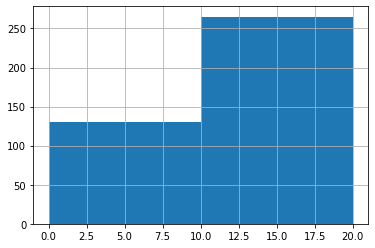

In [5]:
#rozkład zdawalności
students['G3'].hist(bins=2)

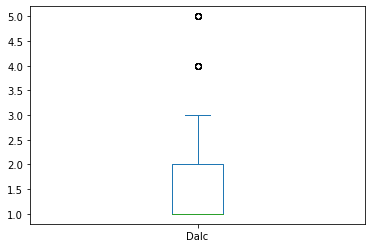

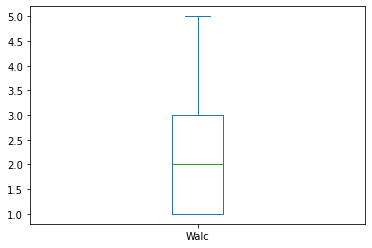

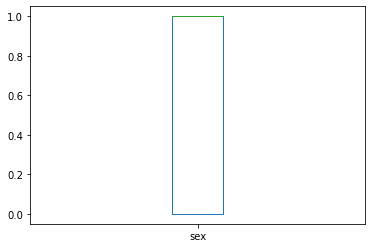

In [6]:
#rozkład danych
students['Dalc'].plot(kind='box') 
plt.show()
students['Walc'].plot(kind='box') 
plt.show()
students['sex'].plot(kind='box') 
plt.show()

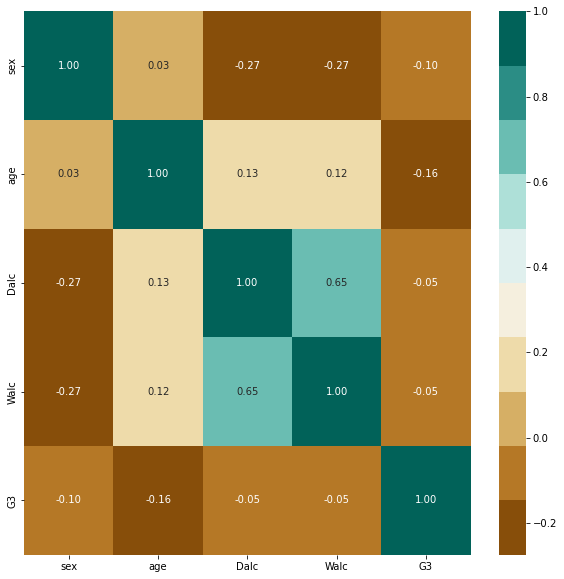

In [7]:
#macierz korelacji

correlations = students.corr()
fig, ax = plt.subplots(figsize=(10, 10))

colormap = sns.color_palette("BrBG", 10)

sns.heatmap(correlations, 
    cmap=colormap, 
    annot=True, 
    fmt=".2f")
ax.set_yticklabels(students.columns);

plt.show()

In [8]:
# zbiór danych
X = students.drop('G3', axis=1).to_numpy()
X

array([[ 1, 18,  1,  1],
       [ 1, 17,  1,  1],
       [ 1, 15,  2,  3],
       ...,
       [ 0, 21,  3,  3],
       [ 0, 18,  3,  4],
       [ 0, 19,  3,  3]])

In [9]:
# zbiór etykiet
y = students.loc[:, 'G3'].to_numpy()
y

array([ 6,  6, 10, 15, 10, 15, 11,  6, 19, 15,  9, 12, 14, 11, 16, 14, 14,
       10,  5, 10, 15, 15, 16, 12,  8,  8, 11, 15, 11, 11, 12, 17, 16, 12,
       15,  6, 18, 15, 11, 13, 11, 12, 18, 11,  9,  6, 11, 20, 14,  7, 13,
       13, 10, 11, 13, 10, 15, 15,  9, 16, 11, 11,  9,  9, 10, 15, 12,  6,
        8, 16, 15, 10,  5, 14, 11, 10, 10, 11, 10,  5, 12, 11,  6, 15, 10,
        8,  6, 14, 10,  7,  8, 18,  6, 10, 14, 10, 15, 10, 14,  8,  5, 17,
       14,  6, 18, 11,  8, 18, 13, 16, 19, 10, 13, 19,  9, 16, 14, 13,  8,
       13, 15, 15, 13, 13,  8, 12, 11,  9,  0, 18,  0,  0, 12, 11,  0,  0,
        0,  0, 12, 15,  0,  9, 11, 13,  0, 11,  0, 11,  0, 10,  0, 14, 10,
        0, 12,  8, 13, 10, 15, 12,  0,  7,  0, 10,  7, 12, 10, 16,  0, 14,
        0, 16, 10,  0,  9,  9, 11,  6,  9, 11,  8, 12, 17,  8, 12, 11, 11,
       15,  9, 10, 13,  9,  8, 10, 14, 15, 16, 10, 18, 10, 16, 10, 10,  6,
       11,  9,  7, 13, 10,  7,  8, 13, 14,  8, 10, 15,  4,  8,  8, 10,  6,
        0, 17, 13, 14,  7

In [10]:
# podział zbioru na dane treningowe i testowe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=5, random_state=12345) 

In [11]:
# uniwersalna metoda do trenowania i oceny modeli

def train_model(classifier, feature_vector_train, label, feature_vector_valid):
    # trenuj model
    classifier.fit(feature_vector_train, label)
    
    with open('titanic_classifier.pickle', 'wb') as handle:
        pickle.dump(classifier, handle)
    
    # wygeneruj przewidywania modelu dla zbioru testowego
    predictions = classifier.predict(feature_vector_valid)
    
    # dokonaj ewaluacji modelu na podstawie danych testowych
    score_vals = [
        metrics.mean_squared_error(predictions, y_test),
        metrics.mean_absolute_error(predictions, y_test)
    ]
    return score_vals

In [12]:
# MODEL 1 - regresja liniowa
accuracy = train_model(linear_model.LinearRegression(), X_train, y_train, X_test)
accuracy_compare = {'LR': accuracy}
print ("LR: ", accuracy)

# MODEL 2 - RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
accuracy = train_model(regressor, X_train, y_train, X_test)
accuracy_compare['random forrest tree'] = accuracy
print ('random forrest tree' , accuracy)

LR:  [31.974916080893667, 4.905773587511712]
random forrest tree [40.8266144917212, 5.731689438339439]


<AxesSubplot:>

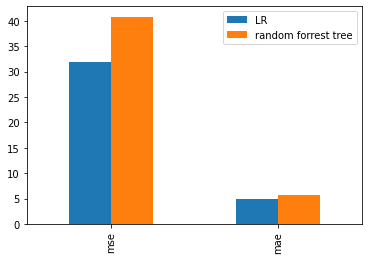

In [13]:
# porównanie modeli

df_compare = pd.DataFrame(accuracy_compare, index = ['mse', 'mae'])
df_compare.plot(kind='bar')